# Import paket yang dibuthkan

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
import pandas as pd
import glob 
import cv2 as cv
import os
import numpy as np
from PIL import Image,ImageFile
from PIL import ImageOps
from random import shuffle
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

If use in local dont use it, because colab must zip data so that the data is not too large when uploaded

Using Google Colab :
- upload dataset zip 
- unzip dataset  

# Unzip dataset

In [4]:
!unzip  label_data.zip

Archive:  label_data.zip
   creating: Normal/
  inflating: Normal/006_palpebral.png  
  inflating: Normal/008_palpebral.png  
  inflating: Normal/015_palpebral.png  
  inflating: Normal/016_palpebral.png  
  inflating: Normal/020_palpebral.png  
  inflating: Normal/028_palpebral.png  
  inflating: Normal/030_palpebral.png  
  inflating: Normal/031_palpebral.png  
  inflating: Normal/20200118_164733_palpebral.png  
  inflating: Normal/20200124_184029_palpebral.png  
  inflating: Normal/20200124_202947_forniceal_palpebral.png  
  inflating: Normal/20200131_205917_palpebral.png  
  inflating: Normal/20200203_094523_palpebral.png  
  inflating: Normal/20200209_122613_palpebral.png  
  inflating: Normal/20200211_140525_palpebral.png  
  inflating: Normal/20200211_143315_palpebral.png  
  inflating: Normal/20200211_145200_palpebral.png  
  inflating: Normal/20200212_080100_palpebral.png  
  inflating: Normal/20200213_134128_palpebral.png  
  inflating: Normal/20200213_151234_palpebral.png  


# Load data gambar

In [5]:
anemia_images=[] #Load data Anemia
for dir in glob.glob('Anemia'):
    for image in glob.glob(os.path.join(dir,"*png")):
        img=cv.imread(image)
        anemia_images.append(img)

In [6]:
plot_anemia_images=np.array(anemia_images)

In [7]:
normal_images=[] #Load data Normal
for dir in glob.glob('Normal'):
    for image in glob.glob(os.path.join(dir,"*png")):
        img=cv.imread(image)
        normal_images.append(img)

In [8]:
plot_normal_images=np.array(normal_images)

# Explore data

In [9]:
print("Total Gambar Anemia ->",len(anemia_images))
print("Total Gambar Normal ->",len(normal_images))

Total Gambar Anemia -> 74
Total Gambar Normal -> 144


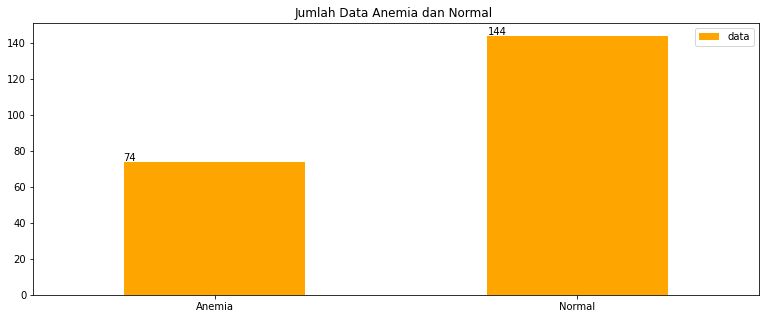

In [10]:
import pandas as pd

# visualisasi jumlah data training dan data validation
data= [len(anemia_images),len(normal_images)]

index = ['Anemia','Normal']
data_am = pd.DataFrame({'data': data}, index=index)
ax = data_am.plot.bar(rot=0, color=['orange'], figsize=(13,5))
ax.set_title("Jumlah Data Anemia dan Normal ")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.savefig("Data.png")


## Visualize data image

In [11]:
def load_images(images):
    # Tampilkan Gambar
    fig = plt.figure(figsize=(15,15))
    for i in range(5):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.title("Image data")
        plt.grid(False)
        plt.imshow(images[i],cmap=plt.cm.binary)
    plt.show()

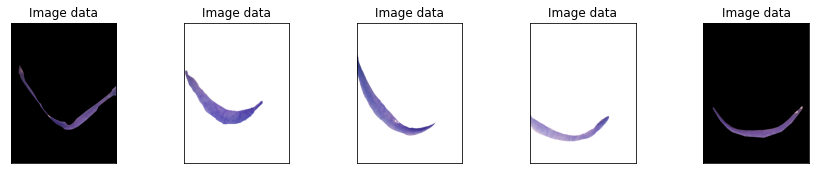

In [10]:
#  tampilkan anemia images
load_images(plot_anemia_images)

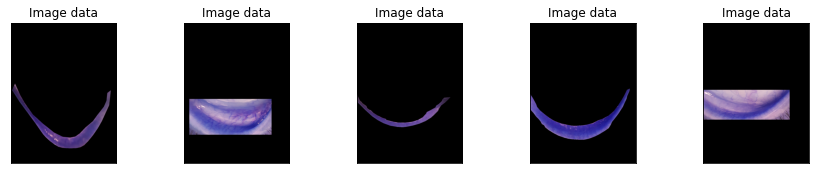

In [11]:
#  tampilkan normal images
load_images(plot_normal_images)

# Augmentasi

In [12]:
import albumentations as alb

In [13]:
aug=alb.Compose([
                alb.HorizontalFlip(p=0.5),
                alb.RandomBrightnessContrast(p=0.2),
                alb.RandomContrast(p=0.2)
                         ])

### Save Augmentation image

#### Save normal image

Make directory for Save augmented image

In [14]:
from functools import partial

In [15]:
list = ('train/NORMAL','train/ANEMIA')

concat_root_path = partial(os.path.join)
make_directory = partial(os.makedirs, exist_ok=True)
  
for path_items in map(concat_root_path, list):
    make_directory(path_items)

In [16]:
list = ('test/NORMAL','test/ANEMIA')

concat_root_path = partial(os.path.join)
make_directory = partial(os.makedirs, exist_ok=True)
  
for path_items in map(concat_root_path, list):
    make_directory(path_items)

In [ ]:
import shutil

In [ ]:
#  JANGAN DI RUN KARENA DAPAT MENGAHPUS FOLDER YANG SUDAH DIBUAT
# DI RUN JIKA HANYA TERJADI KESALAHAN
# shutil.rmtree('test')
# shutil.rmtree('train')

In [17]:
for image_load in ['Normal'] :
    for label in ['NORMAL']:
        for partition in ['train','test']: 
            for image in os.listdir(os.path.join( image_load)):
                img = cv.imread(os.path.join( image_load,  image))
                try: 
                    for x in range(60):
                        augmented = aug(image=img)
                        cv.imwrite(os.path.join(partition,label, f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                except Exception as e:
                    print(e)

#### Save anemia image

In [18]:
for image_load in ['Anemia'] :
    for label in ['ANEMIA']:
        for partition in ['train','test']: 
            for image in os.listdir(os.path.join(image_load)):
                img = cv.imread(os.path.join(image_load,  image))
                try: 
                    for x in range(60):
                        augmented = aug(image=img)
                        cv.imwrite(os.path.join(partition,label, f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                except Exception as e:
                    print(e)

# split data

In [22]:
train_dir = os.path.join('train/')
test_dir = os.path.join('test/')

In [20]:
train_generator = tf.keras.utils.image_dataset_from_directory(
      train_dir,  # This is the source directory for training images
        image_size=(256, 256),  # All images will be resized to 256x256
        # Use binary labels
        class_names=['NORMAL','ANEMIA'],
        validation_split=0.1,
        subset='training',
        seed=5,
        label_mode='binary'
        )

validation_generator = tf.keras.utils.image_dataset_from_directory(
        test_dir ,  # This is the source directory for training images
        image_size=(256, 256),  # All images will be resized to 256x256
         class_names=['NORMAL','ANEMIA'],
        validation_split=0.2,
        subset='validation',
        seed=5,
        # Use binary labels
        label_mode='binary',
       )

Found 13080 files belonging to 2 classes.
Using 11772 files for training.
Found 13080 files belonging to 2 classes.
Using 2616 files for validation.


Visualisasi data setelah augmentasi

Visualisasi data untuk di train dan validasi data untuk model CNN

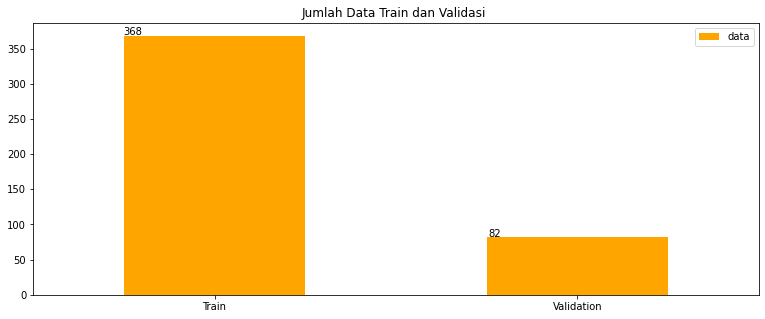

In [21]:
import pandas as pd

# visualisasi jumlah data training dan data validation
data= [len(train_generator),len(validation_generator)]

index = ['Train','Validation']
data_am = pd.DataFrame({'data': data}, index=index)
ax = data_am.plot.bar(rot=0, color=['orange'], figsize=(13,5))
ax.set_title("Jumlah Data Train dan Validasi ")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.savefig("Data_aug_ready_cnn.png")


### Latih CNN

Melatih 128 hidden layer

In [ ]:
model_128_hidden_layer = tf.keras.models.Sequential([
tf.keras.layers.Rescaling(1./255,input_shape=(256,256,3)),

    # layar konvolusi pertama
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Kedua
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Ketiga
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Keempat
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),


#Layar Konvolusi Kelima
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Lakukan Flatten
tf.keras.layers.Flatten(),

#Lakukan Fully connected layer
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
   
])

In [ ]:
model_128_hidden_layer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        1

In [ ]:
model_128_hidden_layer.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

validation_data : Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.

Untuk validation data yang dimasukkan :Data untuk evaluasi loss dan model di akhir epocs atau iterasi, model CNN tidak akan melatih data ini, jadi gunanya validasi data untuk mengevaluasi loss dan model metrik apapun

In [ ]:
history_128=model_128_hidden_layer.fit(
         train_generator,
                steps_per_epoch=10,  # berapa step yang akan dieksekusi pada setiap epoch
                epochs=35,
                validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
                validation_steps=10,  # berapa batch yang akan dieksekusi pada setiap epoch
                )

Epoch 1/35
10/10 [==============================] - 16s 320ms/step - loss: 0.6327 - accuracy: 0.6719 - val_loss: 0.5930 - val_accuracy: 0.7312
Epoch 2/35
10/10 [==============================] - 3s 298ms/step - loss: 0.5794 - accuracy: 0.7219 - val_loss: 0.5598 - val_accuracy: 0.7344
Epoch 3/35
10/10 [==============================] - 3s 325ms/step - loss: 0.6116 - accuracy: 0.6844 - val_loss: 0.5609 - val_accuracy: 0.6969
Epoch 4/35
10/10 [==============================] - 3s 315ms/step - loss: 0.4942 - accuracy: 0.7437 - val_loss: 0.5802 - val_accuracy: 0.7344
Epoch 5/35
10/10 [==============================] - 3s 337ms/step - loss: 0.5277 - accuracy: 0.7437 - val_loss: 0.4816 - val_accuracy: 0.7375
Epoch 6/35
10/10 [==============================] - 3s 292ms/step - loss: 0.4155 - accuracy: 0.7563 - val_loss: 0.4256 - val_accuracy: 0.7781
Epoch 7/35
10/10 [==============================] - 3s 297ms/step - loss: 0.3404 - accuracy: 0.8625 - val_loss: 0.5581 - val_accuracy: 0.7312
Epoch

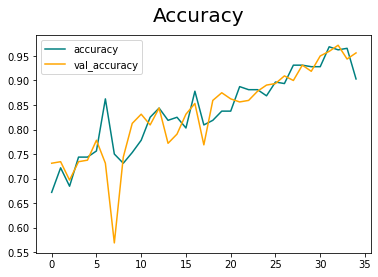

In [ ]:
fig = plt.figure()
plt.plot(history_128.history['accuracy'], color='teal', label='accuracy')
plt.plot(history_128.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("acc_And_vaAcc_128.png")
plt.show()

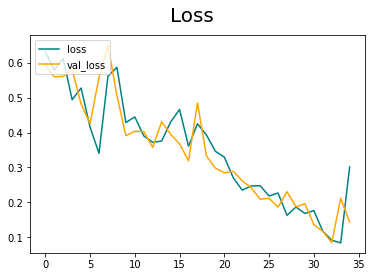

In [ ]:
fig = plt.figure()
plt.plot(history_128.history['loss'], color='teal', label='loss')
plt.plot(history_128.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("Loss_And_valLoss_128.png")
plt.show()

Save model

In [ ]:
os.mkdir('model')

In [ ]:
modelku=model_128_hidden_layer.save(os.path.join('model','imageclassifier_128.h5'))

In [ ]:
load_model_128=tf.keras.models.load_model('model/imageclassifier_128.h5')

In [ ]:
load_model_128.evaluate(validation_generator)

82/82 [==============================] - 8s 91ms/step - loss: 0.1575 - accuracy: 0.9511


[0.15745337307453156, 0.9510703086853027]

Melatih 512 hidden layer

In [ ]:
model_512 = tf.keras.models.Sequential([
tf.keras.layers.Rescaling(1./255,input_shape=(256,256,3)),

    # layar konvolusi pertama
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Kedua
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Ketiga
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Keempat
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),


#Layar Konvolusi Kelima
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Lakukan Flatten
tf.keras.layers.Flatten(),

#Lakukan Fully connected layer
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
   
])

In [ ]:
model_512.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)       

In [ ]:
import pydot 

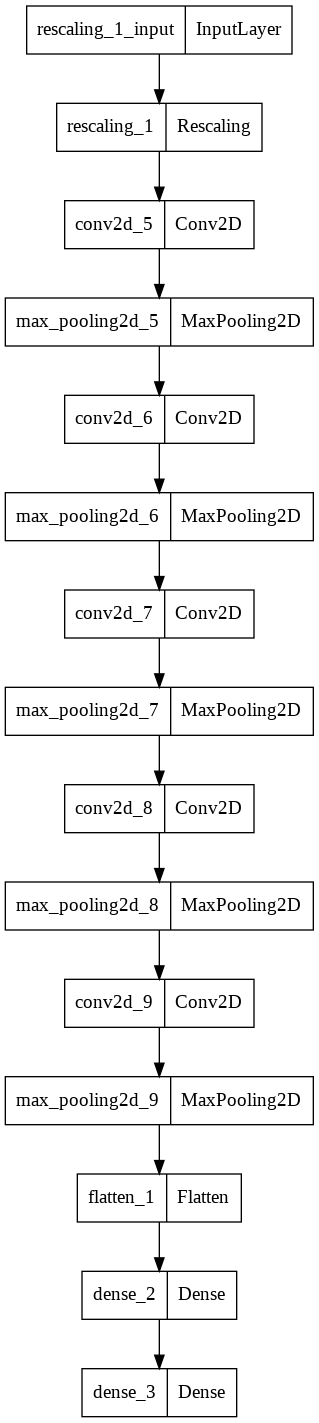

In [ ]:
tf.keras.utils.plot_model(model_512,to_file='model.png')

In [ ]:
model_512.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [ ]:
history_512=model_512.fit(
         train_generator,
                steps_per_epoch=10,  # berapa step yang akan dieksekusi pada setiap epoch
                epochs=35,
                validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
                validation_steps=10,  # berapa batch yang akan dieksekusi pada setiap epoch
                )

Epoch 1/35
10/10 [==============================] - 13s 1s/step - loss: 0.6378 - accuracy: 0.6656 - val_loss: 0.5730 - val_accuracy: 0.7344
Epoch 2/35
10/10 [==============================] - 8s 813ms/step - loss: 0.5771 - accuracy: 0.7250 - val_loss: 0.5328 - val_accuracy: 0.7312
Epoch 3/35
10/10 [==============================] - 8s 793ms/step - loss: 0.6069 - accuracy: 0.6781 - val_loss: 0.5774 - val_accuracy: 0.7094
Epoch 4/35
10/10 [==============================] - 8s 828ms/step - loss: 0.5391 - accuracy: 0.7344 - val_loss: 0.5508 - val_accuracy: 0.7312
Epoch 5/35
10/10 [==============================] - 8s 843ms/step - loss: 0.5455 - accuracy: 0.7469 - val_loss: 0.4844 - val_accuracy: 0.7375
Epoch 6/35
10/10 [==============================] - 8s 859ms/step - loss: 0.4789 - accuracy: 0.7625 - val_loss: 0.4896 - val_accuracy: 0.7469
Epoch 7/35
10/10 [==============================] - 8s 839ms/step - loss: 0.4324 - accuracy: 0.7688 - val_loss: 0.4729 - val_accuracy: 0.8250
Epoch 8/

Evaluation

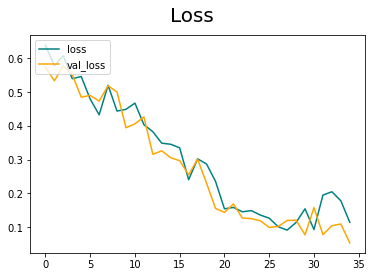

In [ ]:
fig = plt.figure()
plt.plot(history_512.history['loss'], color='teal', label='loss')
plt.plot(history_512.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("Loss_And_valLoss_512.png")
plt.show()

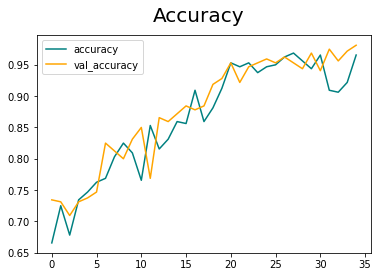

In [ ]:
fig = plt.figure()
plt.plot(history_512.history['accuracy'], color='teal', label='accuracy')
plt.plot(history_512.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("acc_And_vaAcc_512.png")
plt.show()

Tidak ada, adanya overfitt

Save model

In [ ]:
from tensorflow.keras.models import load_model
modelku=model_512.save(os.path.join('model','imageclassifier_512.h5'))

In [ ]:
model_512 = tf.keras.models.load_model('model/imageclassifier_512.h5')

In [ ]:
model_512.evaluate(validation_generator)

82/82 [==============================] - 9s 101ms/step - loss: 0.0293 - accuracy: 0.9950


[0.02928057499229908, 0.9950305819511414]

# Predicted 

In [ ]:
from tensorflow.keras.preprocessing import image

1/1 [==============================] - 0s 101ms/step
[[0.02014131]]
Normal/T_90_20190614_083843_palpebral.png
 Normal


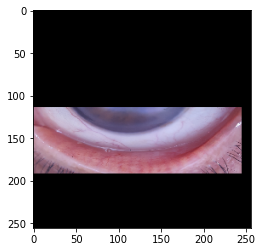

In [ ]:
path = 'Normal/T_90_20190614_083843_palpebral.png'

 
img = image.load_img(path, target_size=(256, 256))
x = image.img_to_array(img)
plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model_512.predict(images, batch_size=10)
print(classes)
if classes>=0.9:
    print(path + "\n Anemia")
else :
    print(path + "\n Normal")
